# Métodos Númericos
## Isaac Gonález
### Tarea 08

---

# Mínimos Cuadrados

- 1. Dados los datos

| $x_i$ |    $4.0$ |    $4.2$ |    $4.5$ |    $4.7$ |    $5.1$ |    $5.5$ |    $5.9$ |    $6.3$ |    $6.8$ |    $7.1$ |
| ----: | -------: | -------: | -------: | -------: | -------: | -------: | -------: | -------: | -------: | -------: |
| $y_i$ | $102.56$ | $130.11$ | $113.18$ | $142.05$ | $167.53$ | $195.14$ | $224.87$ | $256.73$ | $299.50$ | $326.72$ |


a) Construya el polinomio por mínimos cuadrados de grado 1 y calcule el error.


<function matplotlib.pyplot.show(close=None, block=None)>

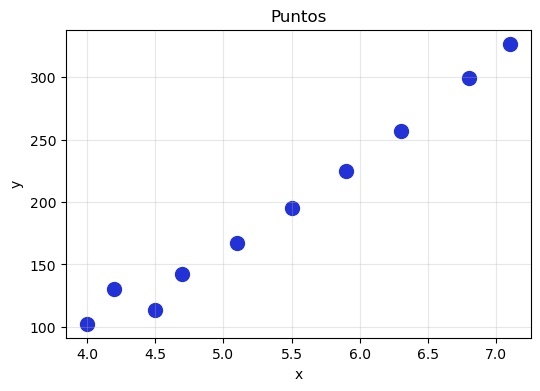

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xs = [4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1]
ys = [102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72]

plt.figure(figsize=(6, 4))
plt.scatter(xs, ys, color="#2332D6", s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Puntos")
plt.grid(True, alpha = 0.3)
plt.show

In [14]:
import logging
from sys import stdout
from datetime import datetime
import os
import numpy as np
from typing import Callable


logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(f"{os.getlogin()}| {datetime.now()}")


# ####################################################################
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float]], tuple]],
) -> np.ndarray:
    """Resuelve el sistema de ecuaciones para encontrar los parámetros del método de mínimos cuadrados. Plantea el sistema de ecuaciones lineales al reemplazar los valores de ``xs`` y ``ys`` en las derivadas parciales.

    ## Parameters

    ``xs``: lista con los valores de x.

    ``ys``: lista con los valores de y.

    ``gradiente``: lista con las funciones de derivadas parciales de ``fcn``.
    [IMPORTANTE] Cada función debe ser de la forma ``der_parcial(xi, yi)->``.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """

    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."

    n = len(xs)

    num_pars = len(gradiente)
    logging.info(f"Se ajustarán {num_pars} parámetros.")
    # --- construir matriz A y vector b
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)

    for i, der_parcial in enumerate(gradiente):
        assert callable(der_parcial), "Cada derivada parcial debe ser una función."

        Ab[i, :] = der_parcial(xs, ys)

    # Solve the linear system using NumPy
    A = Ab[:, :-1]
    b = Ab[:, -1]
    return np.linalg.solve(A, b)

[01-02 12:28:02][INFO] hp| 2026-01-02 12:28:02.015576


In [15]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    # coeficiente del término independiente
    c_ind = sum(ys)
    # coeficiente del parámetro 1
    c_1 = sum(xs)
    # coeficiente del parámetro 0
    c_0 = len(xs)
    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi
        # coeficiente del parámetro 1
        c_1 += xi * xi
        # coeficiente del parámetro 0
        c_0 += xi
    return (c_1, c_0, c_ind)

In [18]:
m, b = ajustar_min_cuadrados(
    xs=xs, ys=ys, gradiente=[der_parcial_1, der_parcial_0]
)
print(f"m: {m}, b: {b}")

error = 0.0
for xi, yi in zip(xs, ys):
    y_aprox = m*xi + b
    error += (yi - y_aprox)**2

print("Error cuadrático:", error)

[01-02 12:34:04][INFO] Se ajustarán 2 parámetros.
m: 71.61024372023518, b: -191.5724185264723
Error cuadrático: 1058.8388862638917


<function matplotlib.pyplot.show(close=None, block=None)>

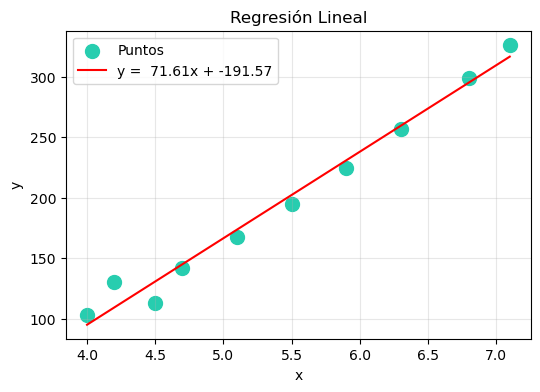

In [19]:
import numpy as np
import matplotlib.pyplot as plt

xs = [4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1]
ys = [102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72]

plt.figure(figsize=(6, 4))
plt.scatter(xs, ys, color="#27CDAF", label="Puntos", s=100)

# Plot the fitted line
x= np.linspace(min(xs), max(xs), 100)

y = m * x + b

plt.plot(x, y, color="red", label=f"y = {m: .2f}x + {b: .2f}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión Lineal")
plt.legend()
plt.grid(True, alpha = 0.3)
plt.show

b) Construya el polinomio por mínimos cuadrados de grado 2 y calcule el error.

In [20]:
def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi
        # coeficiente del parámetro 2
        c_2 += xi**2
        # coeficiente del parámetro 1
        c_1 += xi
        
    # coeficiente del parámetro 0
    c_0 = len(xs)
    
    return (c_2, c_1, c_0, c_ind)

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float,float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi* yi
        # coeficiente del parámetro 2
        c_2 += xi**3
        # coeficiente del parámetro 1
        c_1 += xi**2
        # coeficiente del parámetro 0
        c_0 += xi
        
    return (c_2, c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float,float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi**2 * yi
        # coeficiente del parámetro 2
        c_2 += xi**4
        # coeficiente del parámetro 1
        c_1 += xi**3
        # coeficiente del parámetro 0
        c_0 += xi**2
        
    return (c_2, c_1, c_0, c_ind)

In [21]:
import logging
from sys import stdout
from datetime import datetime
import os
import numpy as np
from typing import Callable


logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(f"{os.getlogin()}| {datetime.now()}")


# ####################################################################
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float], list[float]], tuple]],
) -> np.ndarray:
    """Resuelve el sistema de ecuaciones para encontrar los parámetros del método de mínimos cuadrados. Plantea el sistema de ecuaciones lineales al reemplazar los valores de ``xs`` y ``ys`` en las derivadas parciales.

    ## Parameters

    ``xs``: lista con los valores de x.

    ``ys``: lista con los valores de y.

    ``gradiente``: lista con las funciones de derivadas parciales de ``fcn``.
    [IMPORTANTE] Cada función debe ser de la forma ``der_parcial(xi, yi)->``.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """

    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."

    n = len(xs)

    num_pars = len(gradiente)
    logging.info(f"Se ajustarán {num_pars} parámetros.")
    # --- construir matriz A y vector b
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)

    for i, der_parcial in enumerate(gradiente):
        assert callable(der_parcial), "Cada derivada parcial debe ser una función."

        Ab[i, :] = der_parcial(xs, ys)

    # Solve the linear system using NumPy
    A = Ab[:, :-1]
    b = Ab[:, -1]
    return np.linalg.solve(A, b)

[01-02 12:42:31][INFO] hp| 2026-01-02 12:42:31.964022


In [22]:
xs = [4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1]

ys = [102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72]

a,b,c = ajustar_min_cuadrados(
    xs=xs, ys=ys, gradiente=[der_parcial_2, der_parcial_1, der_parcial_0]
)
print(f"a: {a}, b: {b}, c: {c}")

for xi, yi in zip(xs, ys):
    y_aprox = a*xi**2 + b*xi + c
    error += (yi - y_aprox)**2

print("Error cuadrático:", error)

[01-02 12:43:02][INFO] Se ajustarán 3 parámetros.
a: 8.217072320283874, b: -19.308603792136697, c: 51.000789390367075
Error cuadrático: 1610.4950863809158


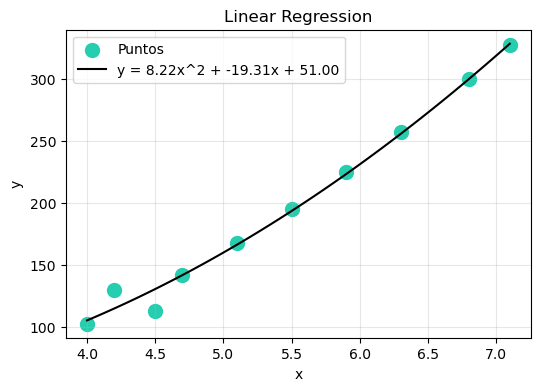

In [23]:
import numpy as np
import matplotlib.pyplot as plt

xs = [4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1]
ys = [102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72]

plt.figure(figsize=(6, 4))
plt.scatter(xs, ys, color="#27CDAF", label="Puntos", s=100)

x = np.linspace(min(xs), max(xs), 100)

y = a*x**2 + b*x + c

plt.plot(x, y, color="black", label=f"y = {a:.2f}x^2 + {b:.2f}x + {c:.2f}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

c) Construya el polinomio por mínimos cuadrados de grado 3 y calcule el error.

In [ ]:
def der_parcial_3(xs: list, ys: list) -> tuple[float, float, float,float,float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_3=0
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi
        # coeficiente del parámetro 3
        c_3 += xi**3
        # coeficiente del parámetro 2
        c_2 += xi**2
        # coeficiente del parámetro 1
        c_1 += xi
        
        # coeficiente del parámetro 0
    c_0 = len(xs)
    
    return (c_3,c_2, c_1, c_0, c_ind)

def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float,float,float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_3=0
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi*xi
        # coeficiente del parámetro 3
        c_3 += xi**4
        # coeficiente del parámetro 2
        c_2 += xi**3
        # coeficiente del parámetro 1
        c_1 += xi**2
        # coeficiente del parámetro 0
        c_0 += xi
        
    
    return (c_3,c_2, c_1, c_0, c_ind)

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float,float,float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_3=0
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi**2 * yi
        # coeficiente del parámetro 3
        c_3 += xi**5
        # coeficiente del parámetro 2
        c_2 += xi**4
        # coeficiente del parámetro 1
        c_1 += xi**3
        # coeficiente del parámetro 0
        c_0 += xi**2
        
    return (c_3,c_2, c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float,float,float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_3=0
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi*xi**3
         # coeficiente del parámetro 3
        c_3 += xi**6
        # coeficiente del parámetro 2
        c_2 += xi**5
        # coeficiente del parámetro 1
        c_1 += xi**4
        # coeficiente del parámetro 0
        c_0 += xi**3
        
    return (c_3, c_2, c_1, c_0, c_ind)

###################################################
import logging
from sys import stdout
from datetime import datetime
import os
import numpy as np
from typing import Callable


logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(f"{os.getlogin()}| {datetime.now()}")


# ####################################################################
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float], list[float], list[float]], tuple]],
) -> np.ndarray:
    """Resuelve el sistema de ecuaciones para encontrar los parámetros del método de mínimos cuadrados. Plantea el sistema de ecuaciones lineales al reemplazar los valores de ``xs`` y ``ys`` en las derivadas parciales.

    ## Parameters

    ``xs``: lista con los valores de x.

    ``ys``: lista con los valores de y.

    ``gradiente``: lista con las funciones de derivadas parciales de ``fcn``.
    [IMPORTANTE] Cada función debe ser de la forma ``der_parcial(xi, yi)->``.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """

    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."

    n = len(xs)

    num_pars = len(gradiente)
    logging.info(f"Se ajustarán {num_pars} parámetros.")
    # --- construir matriz A y vector b
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)

    for i, der_parcial in enumerate(gradiente):
        assert callable(der_parcial), "Cada derivada parcial debe ser una función."

        Ab[i, :] = der_parcial(xs, ys)

    # Solve the linear system using NumPy
    A = Ab[:, :-1]
    b = Ab[:, -1]
    return np.linalg.solve(A, b)

###################################################
xs = [4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1  ]

ys = [102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72]

a,b,c,d= ajustar_min_cuadrados(
    xs=xs, ys=ys, gradiente=[der_parcial_3,der_parcial_2, der_parcial_1, der_parcial_0]
)
print(f"a: {a}, b: {b}, c: {c}, d: {d}")

error = 0

for xi, yi in zip(xs, ys):
    y_aprox = a*xi**3 + b*xi**2 + c*xi + d
    error += (yi - y_aprox)**2

print("Error cuadrático:", error)

[01-02 12:50:46][INFO] hp| 2026-01-02 12:50:46.591991
[01-02 12:50:46][INFO] Se ajustarán 4 parámetros.
a: -2.6068387238949615, b: 51.56095695217632, c: -254.8747834715453, d: 469.16326544006233
Error cuadrático: 518.3830647403067


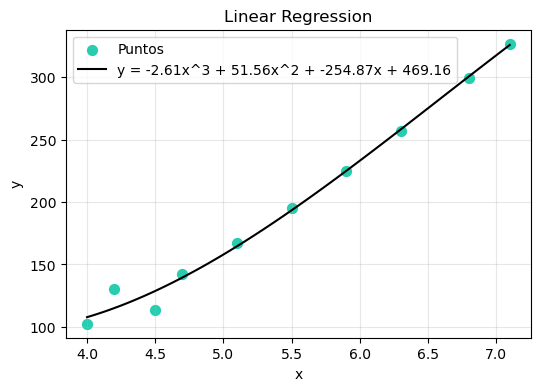

In [25]:
import numpy as np
import matplotlib.pyplot as plt

xs = [4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1]
ys = [102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72]

plt.figure(figsize=(6, 4))
plt.scatter(xs, ys, color="#27CDAF", label="Puntos", s=50)

x= np.linspace(min(xs), max(xs), 100)

y = a*x**3 + b*x**2 + c*x + d

plt.plot(x, y, color="black", label=f"y = {a:.2f}x^3 + {b:.2f}x^2 + {c:.2f}x + {d:.2f}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

d) Construya el polinomio por mínimos cuadrados de la forma $ be^{ax} $ y calcule el error.

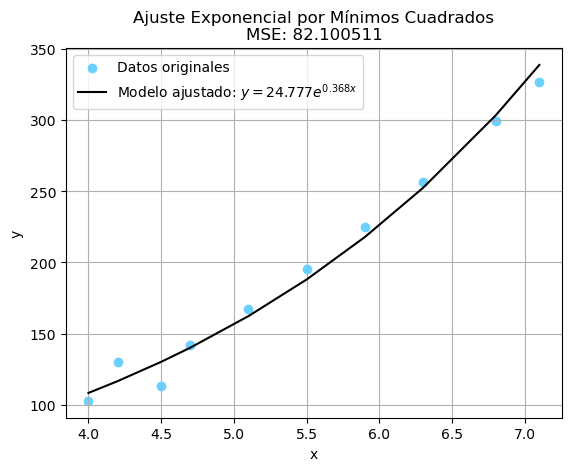

Error cuadrático: 821.0051092577957


In [28]:
def ajuste_exponencial(xs, ys):
    xs = np.array(xs, dtype=float)
    ys = np.array(ys, dtype=float)
    
    log_ys = np.log(ys)
    coeficientes = np.polyfit(xs, log_ys, 1)
    a = coeficientes[0]
    B = coeficientes[1] 
    b = np.exp(B)  
    
    ys_pred = b * np.exp(a * xs)
    
    error = np.sum((ys - ys_pred) ** 2)
    mse = np.mean((ys - ys_pred) ** 2)
    
    plt.scatter(xs, ys, color="#69D0FF", label='Datos originales')
    plt.plot(xs, ys_pred, color='BLACK',
             label=f'Modelo ajustado: $y = {b:.3f}e^{{{a:.3f}x}}$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Ajuste Exponencial por Mínimos Cuadrados\nMSE: {mse:.6f}')
    plt.legend()
    plt.grid()
    plt.show()
    
    return a, b, error
a, b, error = ajuste_exponencial(xs, ys)
print("Error cuadrático:", error)
    

e) Construya el polinomio por mínimos cuadrados de la forma $ bx^{a} $ y calcule el error.

In [30]:
def ajuste_potencial(xs, ys):
    xs = np.array(xs, dtype=float)
    ys = np.array(ys, dtype=float)
    
    log_xs = np.log(xs)
    log_ys = np.log(ys)
    coeficientes = np.polyfit(log_xs, log_ys, 1)
    a = coeficientes[0]
    B = coeficientes[1] 
    b = np.exp(B)  
    
    ys_pred = b * (xs ** a)

    error = np.sum((ys - ys_pred) ** 2)
    mse = np.mean((ys - ys_pred) ** 2)
    
    plt.scatter(xs, ys, color="#4BC3EB", label='Datos originales')
    plt.plot(xs, ys_pred, color='BLACK',
             label=f'Modelo ajustado: $y = {b:.3f}x^{{{a:.3f}}}$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Ajuste Potencia por Mínimos Cuadrados\nError: {error:.3f}')
    plt.legend()
    plt.grid()
    plt.show()
    
    return a, b, error
    

2. Repita el ejercicio 5 para los siguientes datos 

| $x_i$ |      $0.2$ |      $0.3$ |     $0.6$ |     $0.9$ |    $1.1$ |    $1.3$ |    $1.4$ |    $1.6$ |
| ----: | ---------: | ---------: | --------: | --------: | -------: | -------: | -------: | -------: |
| $y_i$ | $0.050446$ | $0.098426$ | $0.33277$ | $0.72660$ | $1.0972$ | $1.5697$ | $1.8487$ | $2.5015$ |


[01-02 13:49:56][INFO] hp| 2026-01-02 13:49:56.657387
[01-02 13:49:56][INFO] Se ajustarán 2 parámetros.
m: 1.66554008, b: -0.5124568240000003


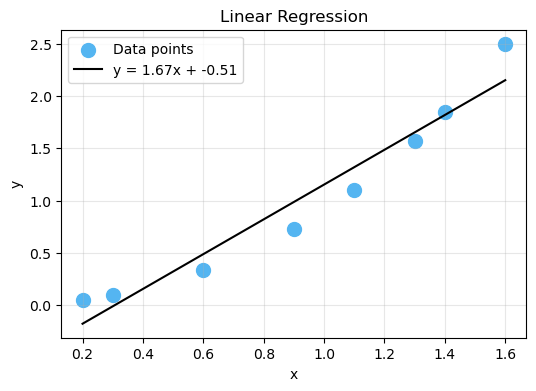

In [31]:
import logging
from sys import stdout
from datetime import datetime
import os
import numpy as np
from typing import Callable


logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(f"{os.getlogin()}| {datetime.now()}")


# ####################################################################
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float]], tuple]],
) -> np.ndarray:
    """Resuelve el sistema de ecuaciones para encontrar los parámetros del método de mínimos cuadrados. Plantea el sistema de ecuaciones lineales al reemplazar los valores de ``xs`` y ``ys`` en las derivadas parciales.

    ## Parameters

    ``xs``: lista con los valores de x.

    ``ys``: lista con los valores de y.

    ``gradiente``: lista con las funciones de derivadas parciales de ``fcn``.
    [IMPORTANTE] Cada función debe ser de la forma ``der_parcial(xi, yi)->``.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """

    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."

    n = len(xs)

    num_pars = len(gradiente)
    logging.info(f"Se ajustarán {num_pars} parámetros.")
    # --- construir matriz A y vector b
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)

    for i, der_parcial in enumerate(gradiente):
        assert callable(der_parcial), "Cada derivada parcial debe ser una función."

        Ab[i, :] = der_parcial(xs, ys)

    # Solve the linear system using NumPy
    A = Ab[:, :-1]
    b = Ab[:, -1]
    return np.linalg.solve(A, b)

# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    # coeficiente del término independiente
    c_ind = sum(ys)
    # coeficiente del parámetro 1
    c_1 = sum(xs)
    # coeficiente del parámetro 0
    c_0 = len(xs)
    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi
        # coeficiente del parámetro 1
        c_1 += xi * xi
        # coeficiente del parámetro 0
        c_0 += xi
    return (c_1, c_0, c_ind)


xs = [0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6]

ys = [0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015]

m, b = ajustar_min_cuadrados(
    xs=xs, ys=ys, gradiente=[der_parcial_1, der_parcial_0]
)
print(f"m: {m}, b: {b}")

import numpy as np

import matplotlib.pyplot as plt

xs = [
    0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6
   
]

ys = [
     0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015

]

# Create the plot
plt.figure(figsize=(6, 4))

# Plot the original data points
plt.scatter(xs, ys, color="#54B5F1", label="Data points", s=100)

# Plot the fitted line
x= np.linspace(min(xs), max(xs), 100)

y= m * x+ b

plt.plot(x, y, color="black", label=f"y = {m:.2f}x + {b:.2f}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

[01-02 13:50:56][INFO] hp| 2026-01-02 13:50:56.546856
[01-02 13:50:56][INFO] Se ajustarán 3 parámetros.
a: 1.129423867019547, b: -0.3114034568310171, c: 0.08514393251738478


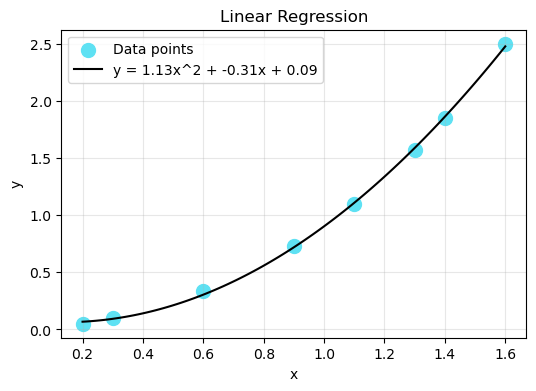

In [33]:
def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi
        # coeficiente del parámetro 2
        c_2 += xi**2
        # coeficiente del parámetro 1
        c_1 += xi
        
    # coeficiente del parámetro 0
    c_0 = len(xs)
    
    return (c_2, c_1, c_0, c_ind)

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float,float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi* yi
        # coeficiente del parámetro 2
        c_2 += xi**3
        # coeficiente del parámetro 1
        c_1 += xi**2
        # coeficiente del parámetro 0
        c_0 += xi
        
    return (c_2, c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float,float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi**2 * yi
        # coeficiente del parámetro 2
        c_2 += xi**4
        # coeficiente del parámetro 1
        c_1 += xi**3
        # coeficiente del parámetro 0
        c_0 += xi**2
        
    return (c_2, c_1, c_0, c_ind)

import logging
from sys import stdout
from datetime import datetime
import os
import numpy as np
from typing import Callable


logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(f"{os.getlogin()}| {datetime.now()}")


# ####################################################################
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float], list[float]], tuple]],
) -> np.ndarray:
    """Resuelve el sistema de ecuaciones para encontrar los parámetros del método de mínimos cuadrados. Plantea el sistema de ecuaciones lineales al reemplazar los valores de ``xs`` y ``ys`` en las derivadas parciales.

    ## Parameters

    ``xs``: lista con los valores de x.

    ``ys``: lista con los valores de y.

    ``gradiente``: lista con las funciones de derivadas parciales de ``fcn``.
    [IMPORTANTE] Cada función debe ser de la forma ``der_parcial(xi, yi)->``.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """

    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."

    n = len(xs)

    num_pars = len(gradiente)
    logging.info(f"Se ajustarán {num_pars} parámetros.")
    # --- construir matriz A y vector b
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)

    for i, der_parcial in enumerate(gradiente):
        assert callable(der_parcial), "Cada derivada parcial debe ser una función."

        Ab[i, :] = der_parcial(xs, ys)

    # Solve the linear system using NumPy
    A = Ab[:, :-1]
    b = Ab[:, -1]
    return np.linalg.solve(A, b)

xs = [
    0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6
   
]

ys = [
     0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015

]
a,b,c = ajustar_min_cuadrados(
    xs=xs, ys=ys, gradiente=[der_parcial_2, der_parcial_1, der_parcial_0]
)
print(f"a: {a}, b: {b}, c: {c}")


import numpy as np

import matplotlib.pyplot as plt


xs = [
    0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6
   
]

ys = [
     0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015

]

# Create the plot
plt.figure(figsize=(6, 4))

# Plot the original data points
plt.scatter(xs, ys, color="#5EE1F3", label="Data points", s=100)

# Plot the fitted line
x= np.linspace(min(xs), max(xs), 100)

y= a*x**2+ b*x + c

plt.plot(x, y, color="black", label=f"y = {a:.2f}x^2 + {b:.2f}x + {c:.2f}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

[01-02 13:51:48][INFO] hp| 2026-01-02 13:51:48.053063
[01-02 13:51:48][INFO] Se ajustarán 4 parámetros.
a: 0.2662080977392518, b: 0.4029322130984173, c: 0.24838578418995033, d: -0.01840139929610755


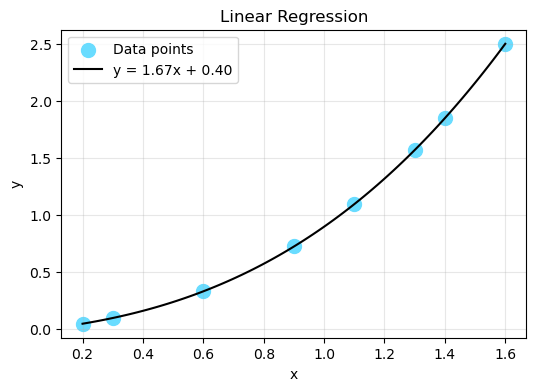

In [35]:
def der_parcial_3(xs: list, ys: list) -> tuple[float, float, float,float,float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_3=0
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi
        # coeficiente del parámetro 3
        c_3 += xi**3
        # coeficiente del parámetro 2
        c_2 += xi**2
        # coeficiente del parámetro 1
        c_1 += xi
        
        # coeficiente del parámetro 0
    c_0 = len(xs)
    
    return (c_3,c_2, c_1, c_0, c_ind)

def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float,float,float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_3=0
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi*xi
        # coeficiente del parámetro 3
        c_3 += xi**4
        # coeficiente del parámetro 2
        c_2 += xi**3
        # coeficiente del parámetro 1
        c_1 += xi**2
        # coeficiente del parámetro 0
        c_0 += xi
        
    
    return (c_3,c_2, c_1, c_0, c_ind)

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float,float,float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_3=0
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi**2 * yi
        # coeficiente del parámetro 3
        c_3 += xi**5
        # coeficiente del parámetro 2
        c_2 += xi**4
        # coeficiente del parámetro 1
        c_1 += xi**3
        # coeficiente del parámetro 0
        c_0 += xi**2
        
    return (c_3,c_2, c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float,float,float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_3=0
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi*xi**3
         # coeficiente del parámetro 3
        c_3 += xi**6
        # coeficiente del parámetro 2
        c_2 += xi**5
        # coeficiente del parámetro 1
        c_1 += xi**4
        # coeficiente del parámetro 0
        c_0 += xi**3
        
    return (c_3, c_2, c_1, c_0, c_ind)

###################################################
import logging
from sys import stdout
from datetime import datetime
import os
import numpy as np
from typing import Callable


logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(f"{os.getlogin()}| {datetime.now()}")


# ####################################################################
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float], list[float], list[float]], tuple]],
) -> np.ndarray:
    """Resuelve el sistema de ecuaciones para encontrar los parámetros del método de mínimos cuadrados. Plantea el sistema de ecuaciones lineales al reemplazar los valores de ``xs`` y ``ys`` en las derivadas parciales.

    ## Parameters

    ``xs``: lista con los valores de x.

    ``ys``: lista con los valores de y.

    ``gradiente``: lista con las funciones de derivadas parciales de ``fcn``.
    [IMPORTANTE] Cada función debe ser de la forma ``der_parcial(xi, yi)->``.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """

    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."

    n = len(xs)

    num_pars = len(gradiente)
    logging.info(f"Se ajustarán {num_pars} parámetros.")
    # --- construir matriz A y vector b
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)

    for i, der_parcial in enumerate(gradiente):
        assert callable(der_parcial), "Cada derivada parcial debe ser una función."

        Ab[i, :] = der_parcial(xs, ys)

    # Solve the linear system using NumPy
    A = Ab[:, :-1]
    b = Ab[:, -1]
    return np.linalg.solve(A, b)

###################################################

xs = [
    0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6
   
]

ys = [
     0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015

]

a,b,c,d= ajustar_min_cuadrados(
    xs=xs, ys=ys, gradiente=[der_parcial_3,der_parcial_2, der_parcial_1, der_parcial_0]
)
print(f"a: {a}, b: {b}, c: {c}, d: {d}")


import numpy as np

import matplotlib.pyplot as plt



xs = [
    0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6
   
]

ys = [
     0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015

]

# Create the plot
plt.figure(figsize=(6, 4))

# Plot the original data points
plt.scatter(xs, ys, color="#69DCFF", label="Data points", s=100)

# Plot the fitted line
x= np.linspace(min(xs), max(xs), 100)

y= a*x**3 + b*x**2 + c*x + d

plt.plot(x, y, color="black", label=f"y = {m:.2f}x + {b:.2f}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

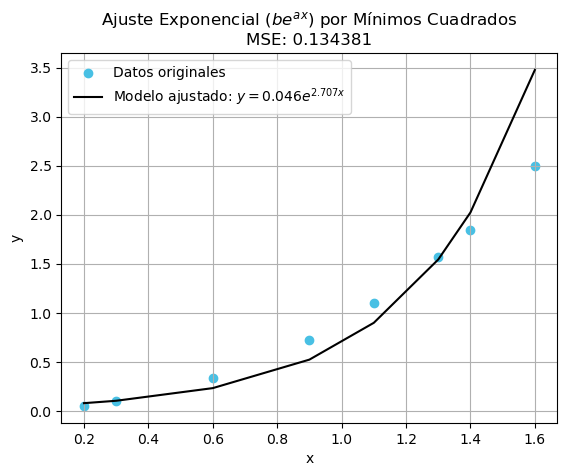

In [37]:
def ajuste_exponencial(xs, ys):
    log_ys = np.log(ys)
    
    coeficientes = np.polyfit(xs, log_ys, 1)
    a = coeficientes[0]
    B = coeficientes[1] 
    b = np.exp(B)  
    
    ys_pred = b * np.exp(a * xs)
    
    mse = np.mean((ys - ys_pred) ** 2)
    
    plt.scatter(xs, ys, color="#48C0E4", label='Datos originales')
    plt.plot(xs, ys_pred, color='BLACK', label=f'Modelo ajustado: $y = {b:.3f}e^{{{a:.3f}x}}$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Ajuste Exponencial ($be^{{ax}}$) por Mínimos Cuadrados\nMSE: {mse:.6f}')
    plt.legend()
    plt.grid()
    plt.show()
xs = np.array(xs)
ys = np.array(ys)
ajuste_exponencial(xs=xs, ys=ys)

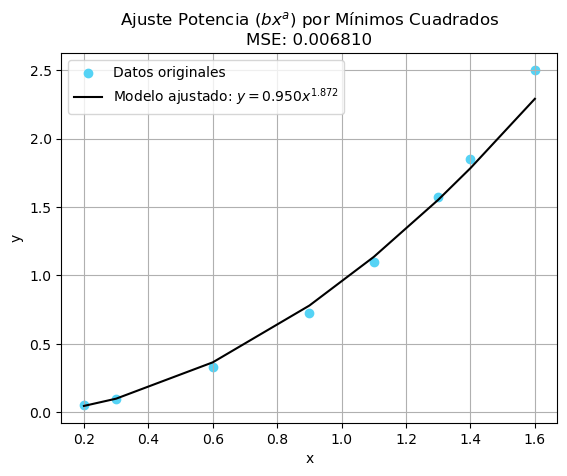

In [38]:
def ajuste_potencia(xs, ys):
    log_xs = np.log(xs)
    log_ys = np.log(ys)
    
    coeficientes = np.polyfit(log_xs, log_ys, 1)
    a = coeficientes[0]
    B = coeficientes[1] 
    b = np.exp(B)  
    
    ys_pred = b * (xs ** a)
    mse = np.mean((ys - ys_pred) ** 2)
    
    plt.scatter(xs, ys, color="#55D3F5", label='Datos originales')
    plt.plot(xs, ys_pred, color='BLACK', label=f'Modelo ajustado: $y = {b:.3f}x^{{{a:.3f}}}$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Ajuste Potencia ($bx^{{a}}$) por Mínimos Cuadrados\nMSE: {mse:.6f}')
    plt.legend()
    plt.grid()
    plt.show()
    
ajuste_potencia(xs=xs, ys=ys)

3. La siguiente tabla muestra los promedios de puntos del colegio de 20 especialistas en matemáticas y ciencias
computacionales, junto con las calificaciones que recibieron estos estudiantes en la parte de matemáticas de
la prueba ACT (Programa de Pruebas de Colegios Americanos) mientras estaban en secundaria. Grafique
estos datos y encuentre la ecuación de la recta por mínimos cuadrados para estos datos. 

| Puntuación ACT | Promedio de puntos | Puntuación ACT | Promedio de puntos |
| -------------: | -----------------: | -------------: | -----------------: |
|           $28$ |             $3.84$ |           $29$ |             $3.75$ |
|           $25$ |             $3.21$ |           $28$ |             $3.65$ |
|           $28$ |             $3.23$ |           $27$ |             $3.87$ |
|           $27$ |             $3.63$ |           $29$ |             $3.75$ |
|           $28$ |             $3.75$ |           $21$ |             $1.66$ |
|           $33$ |             $3.20$ |           $28$ |             $3.12$ |
|           $28$ |             $3.41$ |           $28$ |             $2.96$ |
|           $29$ |             $3.38$ |           $26$ |             $2.92$ |
|           $23$ |             $3.53$ |           $30$ |             $3.10$ |
|           $27$ |             $2.03$ |           $24$ |             $2.81$ |


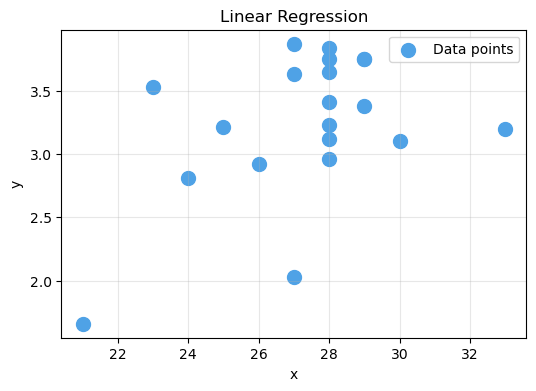

In [39]:
import numpy as np

import matplotlib.pyplot as plt

xs = [28, 25, 28, 27, 28, 33, 28, 29, 23, 27,
      29, 28, 27, 29, 21, 28, 28, 26, 30, 24]

ys = [3.84, 3.21, 3.23, 3.63, 3.75, 3.20, 3.41, 3.38, 3.53, 2.03,
      3.75, 3.65, 3.87, 3.75, 1.66, 3.12, 2.96, 2.92, 3.10, 2.81]



plt.figure(figsize=(6, 4))


plt.scatter(xs, ys, color="#4FA2E6", label="Data points", s=100)


x= np.linspace(min(xs), max(xs), 100)


plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

[01-02 14:09:09][INFO] hp | 2026-01-02 14:09:09.685245
[01-02 14:09:09][INFO] Se ajustarán 4 parámetros.
a: 0.0020018515875796536, b: -0.18397762432243184, c: 5.595486681180138, d: -52.98643679051389
Error cuadrático: 4.02109005890306


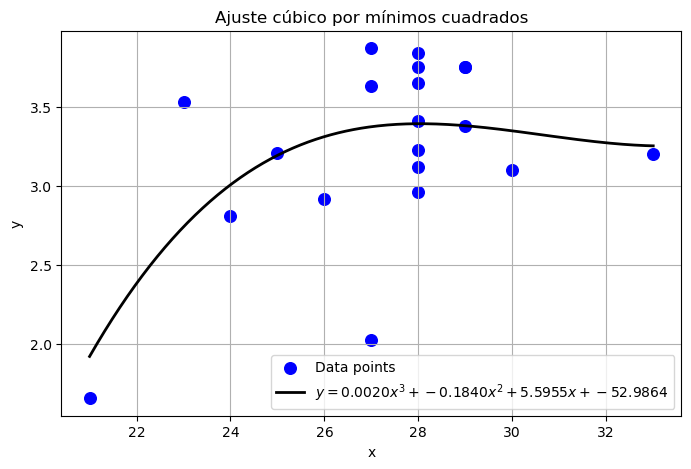

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import logging
from sys import stdout
from datetime import datetime
import os


logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)

logging.info(f"{os.getlogin()} | {datetime.now()}")
logging.info("Se ajustarán 4 parámetros.")


xs = np.array([28, 25, 28, 27, 28, 33, 28, 29, 23, 27,
               29, 28, 27, 29, 21, 28, 28, 26, 30, 24], dtype=float)

ys = np.array([3.84, 3.21, 3.23, 3.63, 3.75, 3.20, 3.41, 3.38, 3.53, 2.03,
               3.75, 3.65, 3.87, 3.75, 1.66, 3.12, 2.96, 2.92, 3.10, 2.81], dtype=float)

# =======================
# Ajuste cúbico por mínimos cuadrados
# y = ax^3 + bx^2 + cx + d
# =======================
coef = np.polyfit(xs, ys, 3)
a, b, c, d = coef

print(f"a: {a}, b: {b}, c: {c}, d: {d}")

x_plot = np.linspace(xs.min(), xs.max(), 300)
y_plot = a*x_plot**3 + b*x_plot**2 + c*x_plot + d

# =======================
# Error cuadrático total
# =======================
error = sum((yi - (a*xi**3 + b*xi**2 + c*xi + d))**2 for xi, yi in zip(xs, ys))
print("Error cuadrático:", error)

plt.figure(figsize=(8,5))
plt.scatter(xs, ys, color="blue", s=70, label="Data points")
plt.plot(
    x_plot,
    y_plot,
    color="black",
    linewidth=2,
    label=fr"$y = {a:.4f}x^3 + {b:.4f}x^2 + {c:.4f}x + {d:.4f}$",
)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste cúbico por mínimos cuadrados")
plt.legend()
plt.grid(True)
plt.show()


[01-02 14:10:02][INFO] hp| 2026-01-02 14:10:02.618254
[01-02 14:10:02][INFO] Se ajustarán 2 parámetros.
m: 0.10085803432137039, b: 0.48657566302658867


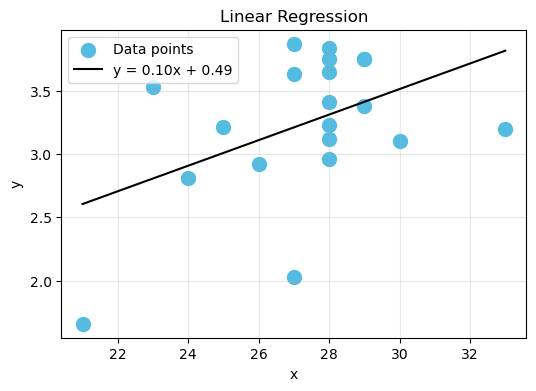

In [45]:
import logging
from sys import stdout
from datetime import datetime
import os
import numpy as np
from typing import Callable


logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(f"{os.getlogin()}| {datetime.now()}")


# ####################################################################
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float]], tuple]],
) -> np.ndarray:
    """Resuelve el sistema de ecuaciones para encontrar los parámetros del método de mínimos cuadrados. Plantea el sistema de ecuaciones lineales al reemplazar los valores de ``xs`` y ``ys`` en las derivadas parciales.

    ## Parameters

    ``xs``: lista con los valores de x.

    ``ys``: lista con los valores de y.

    ``gradiente``: lista con las funciones de derivadas parciales de ``fcn``.
    [IMPORTANTE] Cada función debe ser de la forma ``der_parcial(xi, yi)->``.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """

    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."

    n = len(xs)

    num_pars = len(gradiente)
    logging.info(f"Se ajustarán {num_pars} parámetros.")
    # --- construir matriz A y vector b
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)

    for i, der_parcial in enumerate(gradiente):
        assert callable(der_parcial), "Cada derivada parcial debe ser una función."

        Ab[i, :] = der_parcial(xs, ys)

    # Solve the linear system using NumPy
    A = Ab[:, :-1]
    b = Ab[:, -1]
    return np.linalg.solve(A, b)

# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    # coeficiente del término independiente
    c_ind = sum(ys)
    # coeficiente del parámetro 1
    c_1 = sum(xs)
    # coeficiente del parámetro 0
    c_0 = len(xs)
    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi
        # coeficiente del parámetro 1
        c_1 += xi * xi
        # coeficiente del parámetro 0
        c_0 += xi
    return (c_1, c_0, c_ind)


xs = [28, 25, 28, 27, 28, 33, 28, 29, 23, 27, 
              29, 28, 27, 29, 21, 28, 28, 26, 30, 24]

ys = [
     3.84, 3.21, 3.23, 3.63, 3.75, 3.20, 3.41, 3.38, 3.53, 2.03, 
              3.75, 3.65, 3.87, 3.75, 1.66, 3.12, 2.96, 2.92, 3.10, 2.81]


m, b = ajustar_min_cuadrados(
    xs=xs, ys=ys, gradiente=[der_parcial_1, der_parcial_0]
)
print(f"m: {m}, b: {b}")

import numpy as np

import matplotlib.pyplot as plt

xs = [28, 25, 28, 27, 28, 33, 28, 29, 23, 27, 
              29, 28, 27, 29, 21, 28, 28, 26, 30, 24]

ys = [
     3.84, 3.21, 3.23, 3.63, 3.75, 3.20, 3.41, 3.38, 3.53, 2.03, 
              3.75, 3.65, 3.87, 3.75, 1.66, 3.12, 2.96, 2.92, 3.10, 2.81]


# Create the plot
plt.figure(figsize=(6, 4))

# Plot the original data points
plt.scatter(xs, ys, color="#54BBE1", label="Data points", s=100)

# Plot the fitted line
x= np.linspace(min(xs), max(xs), 100)

y= m * x+ b

plt.plot(x, y, color="black", label=f"y = {m:.2f}x + {b:.2f}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

4. El siguiente conjunto de datos, presentado al Subcomité Antimonopolio del Senado, muestra las
características comparativas de supervivencia durante un choque de automóviles de diferentes clases.
Encuentre la recta por mínimos cuadrados que aproxima estos datos (la tabla muestra el porcentaje de
vehículos que participaron en un accidente en los que la lesión más grave fue fatal o seria). 

| Tipo                            | Peso promedio     | Porcentaje de presentación |
| ------------------------------- | ----------------- | -------------------------- |
| Regular lujoso doméstico        | $4800\ \text{lb}$ | $3.1$                      |
| Regular intermediario doméstico | $3700\ \text{lb}$ | $4.0$                      |
| Regular económico doméstico     | $3400\ \text{lb}$ | $5.2$                      |
| Compacto doméstico              | $2800\ \text{lb}$ | $6.4$                      |
| Compacto extranjero             | $1900\ \text{lb}$ | $9.6$                      |


[01-02 14:17:18][INFO] hp| 2026-01-02 14:17:18.436774
[01-02 14:17:18][INFO] Se ajustarán 2 parámetros.
m: -0.0022549697493517676, b: 13.146499567847867


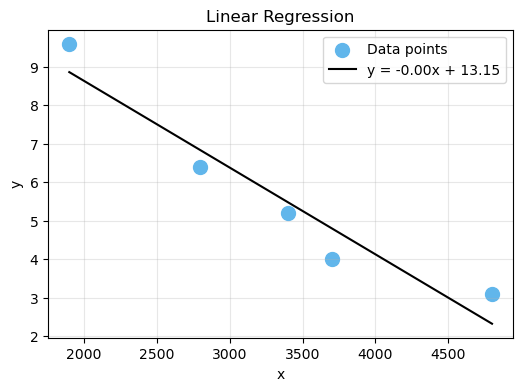

In [47]:
import logging
from sys import stdout
from datetime import datetime
import os
import numpy as np
from typing import Callable


logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(f"{os.getlogin()}| {datetime.now()}")


# ####################################################################
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float]], tuple]],
) -> np.ndarray:
    """Resuelve el sistema de ecuaciones para encontrar los parámetros del método de mínimos cuadrados. Plantea el sistema de ecuaciones lineales al reemplazar los valores de ``xs`` y ``ys`` en las derivadas parciales.

    ## Parameters

    ``xs``: lista con los valores de x.

    ``ys``: lista con los valores de y.

    ``gradiente``: lista con las funciones de derivadas parciales de ``fcn``.
    [IMPORTANTE] Cada función debe ser de la forma ``der_parcial(xi, yi)->``.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """

    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."

    n = len(xs)

    num_pars = len(gradiente)
    logging.info(f"Se ajustarán {num_pars} parámetros.")
    # --- construir matriz A y vector b
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)

    for i, der_parcial in enumerate(gradiente):
        assert callable(der_parcial), "Cada derivada parcial debe ser una función."

        Ab[i, :] = der_parcial(xs, ys)

    # Solve the linear system using NumPy
    A = Ab[:, :-1]
    b = Ab[:, -1]
    return np.linalg.solve(A, b)

# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    # coeficiente del término independiente
    c_ind = sum(ys)
    # coeficiente del parámetro 1
    c_1 = sum(xs)
    # coeficiente del parámetro 0
    c_0 = len(xs)
    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi
        # coeficiente del parámetro 1
        c_1 += xi * xi
        # coeficiente del parámetro 0
        c_0 += xi
    return (c_1, c_0, c_ind)


xs = [4800, 3700, 3400, 2800, 1900]

ys = [3.1, 4.0, 5.2, 6.4, 9.6]


m, b = ajustar_min_cuadrados(
    xs=xs, ys=ys, gradiente=[der_parcial_1, der_parcial_0]
)
print(f"m: {m}, b: {b}")

import numpy as np

import matplotlib.pyplot as plt

xs = [4800, 3700, 3400, 2800, 1900]

ys = [3.1, 4.0, 5.2, 6.4, 9.6]

# Create the plot
plt.figure(figsize=(6, 4))

# Plot the original data points
plt.scatter(xs, ys, color="#61B6EB", label="Data points", s=100)

# Plot the fitted line
x= np.linspace(min(xs), max(xs), 100)

y= m * x+ b

plt.plot(x, y, color="black", label=f"y = {m:.2f}x + {b:.2f}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()